# CS295B F19: Homework 7
## Local Differential Privacy and Synthetic Data

## Instructions

Before you start, download the example dataset and ensure that all cells in this notebook execute without error. If you have trouble getting the notebook to run, please post a question on Piazza.

To ensure that the notebook runs, I've defined a function `your_code_here()` that simply returns the number `1`. Whenever you see a call to this function, you should replace it with code you have written. Please make sure all cells of your notebook run without error before submitting the assignment. If you have not completed all the questions, leave calls to `your_code_here()` in place or insert dummy values so that the cell does not throw an error when it runs.

To help you arrive at the correct solution, I have left the value computed by my solution in the uploaded version of this notebook. You can refer to these example results by viewing the notebook on Github. If you re-run the cell after downloading the notebook, the results will disappear (because the notebook no longer contains the code that generated them). Your solutions should produce results similar to the ones in the uploaded notebook.

When answering non-code questions, feel free to use a comment, or put the cell in Markdown mode and use Markdown.

The assignment is due by 5:00pm on Friday, November 15. When you have finished your assignment, submit it via Gradescope under the assignment "Homework 7." For questions on grading and submitting assignments, refer to the course webpage or email the instructor.

## Collaboration Statement

In the cell below, write your collaboration statement. This statement should describe all collaborations, even high-level ones (e.g. "I discussed my general approach for answering question 3 with Josh"). High-level collaborations of this kind are allowed as long as they are described; copying of answers or code is not allowed.

In [1]:
# Write your collaboration statement here

--------------------

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

# Some useful utilities

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def gaussian_mech(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

def z_clip(xs, b):
    return [min(x, b) for x in xs]

def clip(xs, upper, lower):
    return [max(min(x, upper), lower) for x in xs]

def your_code_here():
    return 1

def test(msg, value, expected):
    if value == expected:
        print(f"{msg}: {value}, as expected")
    else:
        print(f"{msg}: OH NO! Got {value}, but expected {expected}.")

In [67]:
adult_data = pd.read_csv("adult_with_pii.csv", parse_dates=['DOB'])

----------------

## Question 1 (10 points)

Implement a function `rand_resp_over_40` that uses randomized response to answer the question "how many people have ages greater than 40?" 

In [68]:
def aggregate_rr(responses):
    fake_yesses = len(responses)/4
    num_yesses = np.sum([1 if r else 0 for r in responses])
    true_yesses = num_yesses - fake_yesses
    rr_result = true_yesses*2
    return rr_result

def rand_resp_over_40(response):
    return your_code_here()

aggregate_rr([rand_resp_over_40(r) for r in adult_data['Age']])

13217.5

## Question 2 (30 points)

Implement three functions which together use the unary encoding technique to provide a histogram of ages in the US Census dataset. Your solution should consider ages between 0 and 100, and each histogram bin should have a width of 5 years (i.e. a count for `0 <= age < 5`, `5 <= age < 10`, `10 <= age < 15`, and so on).

In [69]:
def encode_unary_age(response):
    return your_code_here()

print(encode_unary_age(0))
print(encode_unary_age(1))
print(encode_unary_age(13))
print(encode_unary_age(19))
print(encode_unary_age(20))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [70]:
def perturb_unary_age(encoded_response):
    return your_code_here()

perturb_unary_age(encode_unary_age(19))

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0]

In [71]:
def aggregate_unary_age(responses):
    return your_code_here()

0 - 5: -72.5
5 - 10: 153.5
10 - 15: 5.5
15 - 20: 1551.5
20 - 25: 4155.5
25 - 30: 4147.5
30 - 35: 4421.5
35 - 40: 4329.5
40 - 45: 3825.5
45 - 50: 3239.5
50 - 55: 2305.5
55 - 60: 2055.5
60 - 65: 1661.5
65 - 70: 881.5
70 - 75: 397.5
75 - 80: 89.5
80 - 85: -34.5
85 - 90: -106.5
90 - 95: -70.5
95 - 100: 175.5


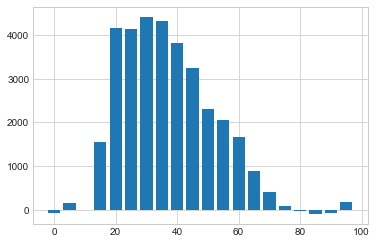

In [72]:
def print_response_unary_age(responses):
    domain = range(0, 100, 5)
    counts = aggregate_unary_age(responses)

    for d, c in zip(domain, counts):
        print('{} - {}: {}'.format(d, d+5, c))
    
    plt.bar(domain, counts, width=4);

responses = [perturb_unary_age(encode_unary_age(r)) for r in adult_data['Age']]
print_response_unary_age(responses)

## Question 3 (30 points)

Consider the `fnlwgt` column of our dataset. This column contains continuous data (not categorical data), with an interesting underlying distribution:

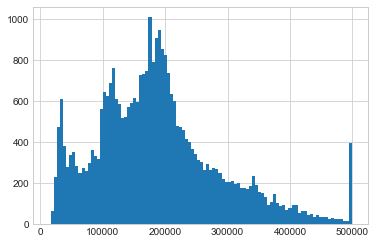

In [73]:
plt.hist(adult_data['fnlwgt'].clip(lower=0, upper=500000), bins=100);

Write code to generate a synthetic representation of this data. Your representation should be a histogram over the range from 0 to 500,000, with a bin width of 5000. You can use the `range_query` function, defined below, to help generate the required counts.

In [74]:
def range_query(df, col, a, b):
    return len(df[(df[col] >= a) & (df[col] < b)])

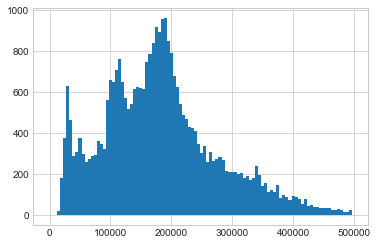

In [75]:
def gen_synthetic_data(epsilon):
    bin_size = 5000
    bins = range(0, 500000, bin_size)
    return your_code_here()

syn_data = gen_synthetic_data(1.0)

## Question 4 (30 points)

Using your synthetic data from the last question, generate tabular data with 5000 synthetic data points. Keep in mind that the `fnlwgt` column contains continuous data, and your synthetic tabular data should too.

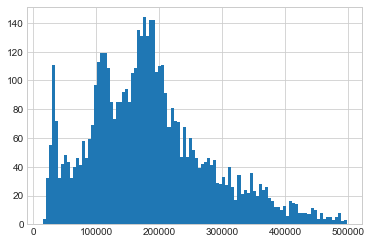

In [77]:
def gen_sample(syn_data):
    bin_size = 5000
    bins = range(0, 500000, bin_size)
    return your_code_here()

samples = [gen_sample(syn_data) for i in range(5000)]
plt.hist(samples, bins=100);